Hugging Face is an NLP library based on deep learning models called Transformers.  We will be using the library to do the sentiment analysis with just a few lines of code.

In [1]:
! pip install transformers -q

In [2]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

In [4]:
classifier('code didnt work, got me a refund.')

[{'label': 'NEGATIVE', 'score': 0.9995050430297852}]

In [9]:
import pandas as pd

In [12]:
df = pd.read_csv('data/small_corpus.csv',index_col=0)
df['reviews']= df['reviews'].astype(str)

In [13]:
df.head()

,ratings,reviews
122468,1,Recently UBISOFT had to settle a huge class-ac...
495370,1,"code didn't work, got me a refund."
214717,1,"these do not work at all, all i get is static ..."
231734,1,well let me start by saying that when i first ...
154709,1,"Dont waste your money, you will just end up us..."


In [5]:
def score_to_Target(value):
    if value >= 5:
        return 2
    if value <= 4 and value >= 2:
        return 1
    else:
        return 0

In [6]:
df['rating_classes'] = df['ratings'].apply(lambda x:score_to_Target(x))

In [7]:
df['reviews']= df['reviews'].astype(str)

In [8]:
def predicated_Classes(review,threshold):
    predicated = classifier(review)[0]
    label = predicated["label"]
    score = predicated["score"]
    return (label,score)

In [32]:
df['Predicated_classes'] = df['reviews'].apply(lambda x: predicated_Classes(x[:512],0.95))

In [33]:
df.to_csv('data/pipeline_with_95.scv')

In [34]:
df.head()

,Unnamed: 0,ratings,reviews,rating_classes,Predicated_classes
0,122468,1,Recently UBISOFT had to settle a huge class-ac...,0,0
1,495370,1,"code didn't work, got me a refund.",0,0
2,214717,1,"these do not work at all, all i get is static ...",0,0
3,231734,1,well let me start by saying that when i first ...,0,0
4,154709,1,"Dont waste your money, you will just end up us...",0,0


In [35]:
rating_classes = list(df["rating_classes"])
predicated_values  = list(df["Predicated_classes"])

In [36]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(rating_classes, predicated_values)

In [37]:
target_names = ["negative", "neutral", "positive"]
from sklearn.metrics import classification_report
print(classification_report(rating_classes, predicated_values, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.60      0.89      0.72      1500
     neutral       0.50      0.14      0.22      1500
    positive       0.67      0.83      0.74      1500

    accuracy                           0.62      4500
   macro avg       0.59      0.62      0.56      4500
weighted avg       0.59      0.62      0.56      4500



In [38]:
import altair as alt
import numpy as np
from sklearn.metrics import confusion_matrix
x, y = np.meshgrid(range(0, 3), range(0, 3))
cm=confusion_matrix(rating_classes, predicated_values, labels=[0, 1, 2])

In [39]:
cm

array([[1335,   92,   73],
       [ 735,  216,  549],
       [ 138,  123, 1239]])

In [40]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

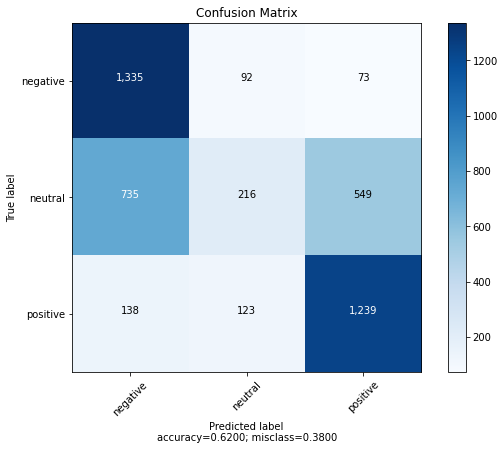

In [41]:
plot_confusion_matrix(cm           = cm,
                      normalize    = False,
                      target_names = ["negative", "neutral", "positive"],
                      title        = "Confusion Matrix")